In [2]:
import numpy as np 
import scipy as sp
import math
import matplotlib.pyplot as plt 
import numpy.lib.scimath

### 4
***Вычислить интеграл $$ \int_0^1 \frac{4}{1+x^2}dx$$ интервалов сетки N = 16, 32, 64, 128, 256 . Затем с помощью формулы (13) или формулы (14) построить график эффективного порядка. Провести уточнение решения по формуле Ричардсона, получив из 5 расчетных значений 4 уточненных. По уточненным значениям вновь построить график эффективного порядка.***

[3.140941612041389, 3.141429893174974, 3.141551963485656, 3.141582481063752, 3.1415901104582806]
5


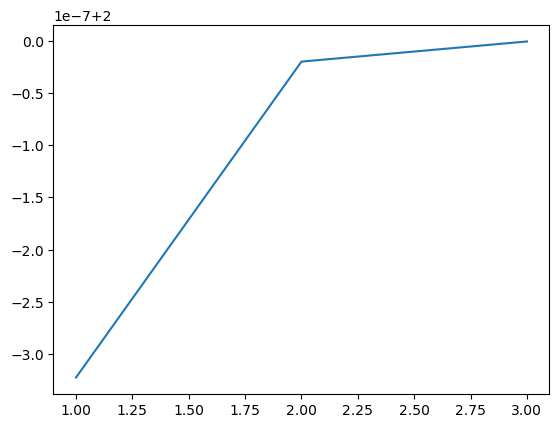

In [3]:
# N - количество интервалов сетки
# a - левая граница интеграла
# b - правая граница интеграла
# h - шаг сетки

def func(x):
    return 4/(1+x**2)

I_mass = []

def Int(a,b,N):
    h = (b - a)/N
    i = 0
    I = 0
    while i < N:
        I = I + (func(a + i/N) + func(a + (i+1)/N))*h/2
        i+=1
    I_mass.append(I)

N = [16, 32, 64, 128, 256]

i = 0
while i < len(N):
    Int(0,1,N[i])
    i+=1

print(I_mass)

i = 0
x_trio=[1,2,3]
p=[]
while i < 3:
    p.append(math.log(((I_mass[i+2]-I_mass[i+1])/(I_mass[i+1]-I_mass[i])),1/2))
    i+=1
plt.plot(x_trio, p)
print(len(I_mass))

[3.1414624452505464, 3.1415601015063683, 3.1415845155689586, 3.1415906190845826]


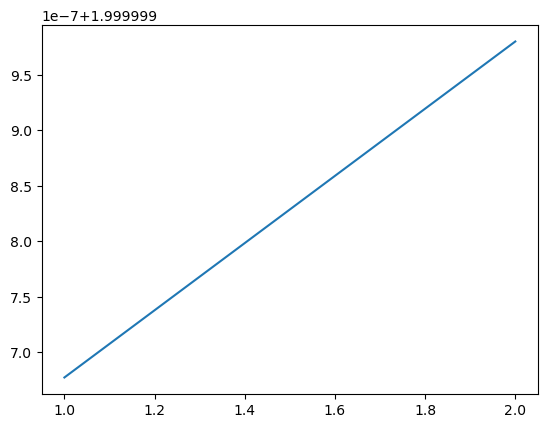

In [4]:
def Richardson(p,r,U_h,U_rh):
    return (((r**(-p))*U_rh - U_h)/(r**(-p)-1))

I_mass_Richardson=[]

i = 0
while i < len(I_mass)-1:
    I_mass_Richardson.append(Richardson(4,1/2,I_mass[i],I_mass[i+1]))
    i+=1
print(I_mass_Richardson)

i = 0
x_trio=[1,2]
p=[]
while i < len(x_trio):
    p.append(math.log(((I_mass[i+2]-I_mass[i+1])/(I_mass[i+1]-I_mass[i])),1/2))
    i+=1
plt.plot(x_trio, p)

### 5
***Вычислить интеграл $$ \int_0^1 \frac{1}{2\sqrt(x)}dx$$ по формуле средних прямоугольников при тех же N . Определить эффективный порядок, провести уточнение по Эйткену (получив 3 уточненных значения), вновь определить эффективный порядок. После этого провести еще одно уточнение решения по Эйткену и сравнить полученный результат с точным значением интеграла.***

[2.3796632602418732, 1.6518323446097034, 1.298876563546087, 1.1300867852746532, 1.051035024170956]


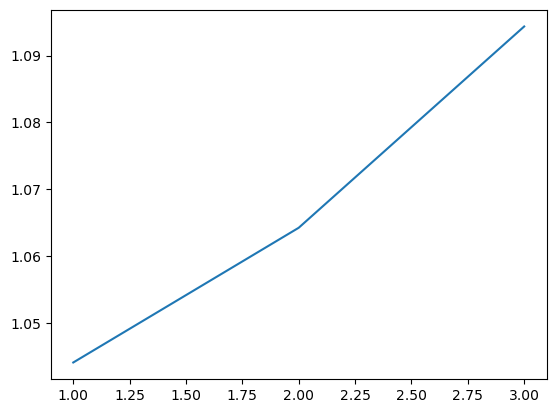

In [5]:
# N - количество интервалов сетки
# a - левая граница интеграла
# b - правая граница интеграла
# h - шаг сетки

def func(x):
    return 1/(2*np.sqrt(x))

I_mass = []

def Int(a,b,N):
    h = (b - a)/N
    i = 0
    I = 0
    while i < N:
        I = I + (func(a + 0.0001 + i/N) + func(a + 0.0001 + (i+1)/N))*h/2
        i+=1
    I_mass.append(I)

N = [16, 32, 64, 128, 256]

i = 0
while i < len(N):
    Int(0,1,N[i])
    i+=1

print(I_mass)

i = 0
x_trio=[1,2,3]
p=[]
while i < 3:
    p.append(math.log(((I_mass[i+2]-I_mass[i+1])/(I_mass[i+1]-I_mass[i])),1/2))
    i+=1
plt.plot(x_trio, p)

In [6]:
def Atiken(U_r_2_h, U_r_h, U_h):
    return (U_r_2_h + (U_r_2_h - U_r_h)/((U_r_h - U_h)/(U_r_2_h - U_r_h)-1))


I_mass_Atiken=[]
i = 0
while i < len(I_mass)-2:
    I_mass_Atiken.append(Atiken(I_mass[i+2],I_mass[i+1],I_mass[i]))
    i+=1
print("Уточнение по Эйткену",I_mass_Atiken)

print("Эффективный порядок",math.log(((I_mass_Atiken[2]-I_mass_Atiken[1])/(I_mass_Atiken[1]-I_mass_Atiken[0])),1/2))

print("Последнее уточнение по Эйткену",Atiken(I_mass_Atiken[2],I_mass_Atiken[1],I_mass_Atiken[0]))
print("На сколько мы ошиблись при вычислении", 1-Atiken(I_mass_Atiken[2],I_mass_Atiken[1],I_mass_Atiken[0]))

Уточнение по Эйткену [0.9665584877430466, 0.9753894534274252, 0.9813969696336561]
Эффективный порядок 0.5558025729295801
Последнее уточнение по Эйткену 0.9941792953835763
На сколько мы ошиблись при вычислении 0.0058207046164237
